In [29]:
import os

import numpy as np
import matplotlib.pyplot as plt

from mazemdp.maze import build_maze, create_random_maze
from random import seed
from mazemdp import create_random_maze
from replay_sim import Agent
from utils import evaluate, to_plot, Replay, SimuData

from arguments import get_args, get_args_string
import argparse
from IPython.display import display, clear_output

In [30]:
parser = argparse.ArgumentParser()
parser.add_argument("--pre_explore", type = bool, default = True)
parser.add_argument("--start_random", type = bool, default = False)
parser.add_argument("--transi_goal_to_start", type = bool, default = True)

parser.add_argument("--plan_policy", type = str, default = "softmax")
parser.add_argument("--plan_only_start_end", type = bool, default = True)
parser.add_argument("--planning_steps", type = int, default = 20)
parser.add_argument("--expand_further", type = bool, default = True)

parser.add_argument("--set_all_need_to_1", type = bool, default = False)
parser.add_argument("--set_all_gain_to_1", type = bool, default = False)
parser.add_argument("--baseline_gain", type = float, default = 1e-10)
parser.add_argument("--EVM_thresh", type = float, default = 0)

parser.add_argument("--allow_loops", type = bool, default = False)
parser.add_argument("--online_offline", type = str, default = "online")
parser.add_argument("--remove_samestate", type = bool, default = True)


parser.add_argument("--gamma", type = float, default = 0.9)
parser.add_argument("--alpha", type = float, default = 1)
parser.add_argument("--lambda_", type = float, default = 0)
parser.add_argument("--T_learning_rate", type = float, default = 0.9)

parser.add_argument("--action_policy", type = str, default = "softmax")
parser.add_argument("--epsilon", type = float, default = 0.05)
parser.add_argument("--tau", type = float, default = 0.2)

parser.add_argument("--simulations", type = int, default = 50)
parser.add_argument("--episodes", type = int, default = 50)
parser.add_argument("--max_episode_steps", type = int, default = 1e5)

parser.add_argument("--reward_change_proba", type = float, default = 0)
parser.add_argument("--reward_multiplicator", type = float, default = 1)

_StoreAction(option_strings=['--reward_multiplicator'], dest='reward_multiplicator', nargs=None, const=None, default=1, type=<class 'float'>, choices=None, help=None, metavar=None)

In [31]:
args = parser.parse_args("") # trick for argparse on note book
all_default = {}
for key in vars(args):
    all_default[key] = parser.get_default(key)
print(all_default)

{'pre_explore': True, 'start_random': False, 'transi_goal_to_start': True, 'plan_policy': 'softmax', 'plan_only_start_end': True, 'planning_steps': 20, 'expand_further': True, 'set_all_need_to_1': False, 'set_all_gain_to_1': False, 'baseline_gain': 1e-10, 'EVM_thresh': 0, 'allow_loops': False, 'online_offline': 'online', 'remove_samestate': True, 'gamma': 0.9, 'alpha': 1, 'lambda_': 0, 'T_learning_rate': 0.9, 'action_policy': 'softmax', 'epsilon': 0.05, 'tau': 0.2, 'simulations': 50, 'episodes': 50, 'max_episode_steps': 100000.0, 'reward_change_proba': 0, 'reward_multiplicator': 1}


In [32]:
mdp = create_random_maze(5, 5, 0.2)
args.reward_change_proba = 0.5
args.reward_multiplicator = 0 #0 for fig 5_e
args.episodes = 20
args.simulations = 20
print(get_args_string(args))
list_data = []
for i in range(args.simulations):
    print("#### SIM NB: {}".format(i))
    replay = Replay()
    saver = SimuData(replay)
    rat = Agent(mdp, args, saver)
    rat.learn(args, seed = i)
    list_data.append(saver)

0_0.9_softmax_False_1_1e-10_20_0.05_True_0.9_0_100000.0_online_True_softmax_20_True_True_0.5_0_False_False_20_False_0.2_True_
#### SIM NB: 0


/home/hector/Desktop/IAR/Project/utils.py:114: RuntimeWarning: invalid value encountered in true_divide
  new_matrix = matrix / row_sums[:, np.newaxis]


#### EPISODE 1 ####
TRAIN: 783
#### EPISODE 2 ####
TRAIN: 101
#### EPISODE 3 ####
TRAIN: 40
#### EPISODE 4 ####
TRAIN: 78
#### EPISODE 5 ####
TRAIN: 9
#### EPISODE 6 ####
TRAIN: 35
#### EPISODE 7 ####
TRAIN: 9
#### EPISODE 8 ####
TRAIN: 90
#### EPISODE 9 ####
TRAIN: 7
#### EPISODE 10 ####
TRAIN: 7
#### EPISODE 11 ####
TRAIN: 124
#### EPISODE 12 ####
TRAIN: 8
#### EPISODE 13 ####
TRAIN: 53
#### EPISODE 14 ####
TRAIN: 909
#### EPISODE 15 ####
TRAIN: 7
#### EPISODE 16 ####
TRAIN: 7
#### EPISODE 17 ####
TRAIN: 9
#### EPISODE 18 ####
TRAIN: 41
#### EPISODE 19 ####
TRAIN: 9
#### EPISODE 20 ####
TRAIN: 78
#### SIM NB: 1
#### EPISODE 1 ####
TRAIN: 200
#### EPISODE 2 ####
TRAIN: 10
#### EPISODE 3 ####
TRAIN: 23
#### EPISODE 4 ####
TRAIN: 44
#### EPISODE 5 ####
TRAIN: 1236
#### EPISODE 6 ####
TRAIN: 7
#### EPISODE 7 ####
TRAIN: 14
#### EPISODE 8 ####
TRAIN: 8
#### EPISODE 9 ####
TRAIN: 11
#### EPISODE 10 ####
TRAIN: 8
#### EPISODE 11 ####
TRAIN: 11
#### EPISODE 12 ####
TRAIN: 9
#### EPISODE 13 #

#### EPISODE 2 ####
TRAIN: 7
#### EPISODE 3 ####
TRAIN: 13
#### EPISODE 4 ####
TRAIN: 11
#### EPISODE 5 ####
TRAIN: 13
#### EPISODE 6 ####
TRAIN: 237
#### EPISODE 7 ####
TRAIN: 683
#### EPISODE 8 ####
TRAIN: 1155
#### EPISODE 9 ####
TRAIN: 7
#### EPISODE 10 ####
TRAIN: 13
#### EPISODE 11 ####
TRAIN: 734
#### EPISODE 12 ####
TRAIN: 199
#### EPISODE 13 ####
TRAIN: 13
#### EPISODE 14 ####
TRAIN: 15
#### EPISODE 15 ####
TRAIN: 24
#### EPISODE 16 ####
TRAIN: 20
#### EPISODE 17 ####
TRAIN: 35
#### EPISODE 18 ####
TRAIN: 34
#### EPISODE 19 ####
TRAIN: 23
#### EPISODE 20 ####
TRAIN: 8
#### SIM NB: 14
#### EPISODE 1 ####
TRAIN: 96
#### EPISODE 2 ####
TRAIN: 7
#### EPISODE 3 ####
TRAIN: 22
#### EPISODE 4 ####
TRAIN: 537
#### EPISODE 5 ####
TRAIN: 682
#### EPISODE 6 ####
TRAIN: 189
#### EPISODE 7 ####
TRAIN: 648
#### EPISODE 8 ####
TRAIN: 291
#### EPISODE 9 ####
TRAIN: 11
#### EPISODE 10 ####
TRAIN: 11
#### EPISODE 11 ####
TRAIN: 9
#### EPISODE 12 ####
TRAIN: 19
#### EPISODE 13 ####
TRAIN: 16
###

In [33]:
### ANALYSIS ###

min_num_cells = 5
min_frac_cells = 0
forward_count = np.zeros((len(list_data), mdp.nb_states))
reverse_count = np.zeros((len(list_data), mdp.nb_states))
forward_count_baseline = np.zeros((len(list_data), mdp.nb_states))
forward_count_rew_shift = np.zeros((len(list_data), mdp.nb_states))
reverse_count_baseline = np.zeros((len(list_data), mdp.nb_states))
reverse_count_rew_shift = np.zeros((len(list_data), mdp.nb_states))
next_state = np.full((mdp.nb_states, 4), np.NaN)

In [34]:
for s in range(mdp.nb_states):
    for a in range(mdp.action_space.size):
        mdp.reset()
        mdp.current_state = s
        s_next, _, _, _ = mdp.step(a)
        next_state[s, a] = s_next

In [35]:

def get_candidate_events(data, mdp, min_frac_cells, min_num_cells):
    #Identify candidate replay events: timepoints in which the number of replayed states is greater than minFracCells,minNumCells
    candidate_events = []
    for idx, r_s in enumerate(data.replay.state):
        if len(r_s) >= max(mdp.nb_states * min_frac_cells , min_num_cells):
            candidate_events.append(idx)

    return candidate_events

In [36]:
## FIG 5 C or E ##
for k, data in enumerate(list_data):
    data.replay.state = np.array(data.replay.state).T
    data.replay.action = np.array(data.replay.action).T
    candidate_events = get_candidate_events(data, mdp, min_frac_cells, min_num_cells)
    agent_pos = np.array(data.list_exp)[candidate_events]# agent position during each candidate event
    agent_pos = agent_pos[:,0]
    for e, evt in enumerate(candidate_events):
        event_state = np.array(data.replay.state[evt]) # In a multi-step sequence, simData.replay.state has 1->2 in one row, 2->3 in another row, etc
        event_action = np.array(data.replay.action[evt]) # In a multi-step sequence, simData.replay.action has the action taken at each step of the trajectory
        # Identify break points in this event, separating event into sequences
        event_dir = np.full(len(event_state)- 1, "")
        break_points = [0] # Save breakpoints that divide contiguous replay events

        for i, evt_state in enumerate(event_state[:-1]):
            # If state(i) and action(i) leads to state(i+1): FORWARD
            if next_state[int(event_state[i]), int(event_action[i])] == event_state[i +1]:
                event_dir[i] = "F"

            # If state(i+1) and action(i+1) leads to state(i): REVERSE
            if next_state[int(event_state[i + 1]), int(event_action[i + 1])] == event_state[i]:
                event_dir[i] = "R"

            if event_dir[i] == "": # If this transition was neither forward nor backward
                break_points.append(i - 1) # Then, call this a breakpoint

            elif i > 0:
                if event_dir[i] != event_dir[i - 1]:
                    break_points.append(i - 1)

            if (i) == (len(event_state) - 1):
                break_points.append(i) # Add a breakpoint after the last transition

        # Break this event into segments of sequential activity
        for j, b_pt in enumerate(break_points[:-1]):
            this_chunk = list(range(break_points[j] + 1, break_points[j + 1] + 1))
            if (len(this_chunk) + 1) >= min_num_cells:
                # Extract information from this sequential event
                replay_dir = event_dir[this_chunk] # Direction of transition
                replay_state = event_state[this_chunk + [this_chunk[-1] + 1]] # start state
                replay_action = event_action[this_chunk + [this_chunk[-1] + 1]] # action
                
                reward_s_n = [data.list_exp[h][3] in [mdp.nb_states - 1] for h in range(evt)] #reward_tsi identifies the timepoint corresponding to the last reward received (at or prior to the current chunk) 
                last_reward_s_n = 0
                for idx , bol in enumerate(reward_s_n):
                    if bol:
                        last_reward_s_n = idx

                last_reward_mag = data.list_exp[last_reward_s_n][3] # lastReward_mag is the magnitude of the last reward received, prior to this chunk
                if replay_dir[0] == "F":
                    if last_reward_mag != args.reward_multiplicator:
                        forward_count_baseline[k, int(agent_pos[e])] +=1
                    else:
                        forward_count_rew_shift[k, int(agent_pos[e])] +=1
                        
                elif replay_dir[0] == "R":
                    if last_reward_mag != args.reward_multiplicator:
                        reverse_count_baseline[k, int(agent_pos[e])] +=1
                    else:
                        reverse_count_rew_shift[k, int(agent_pos[e])] +=1


num_ep_baseline = args.episodes * (1 - args.reward_change_proba)
num_ep_rew_shift = args.episodes * (args.reward_change_proba)

preplay_forward_baseline = np.nansum(forward_count_baseline [:, : -1], axis = 0 ) / num_ep_baseline
replay_forward_baseline = np.nansum(forward_count_baseline [:,-1], axis = 0 ) / num_ep_baseline
preplay_reverse_baseline = np.nansum(reverse_count_baseline [:, : -1], axis = 0 ) / num_ep_baseline
replay_reverse_baseline =  np.nansum(reverse_count_baseline [:,-1], axis = 0 ) / num_ep_baseline

preplay_forward_rew_shift = np.nansum(forward_count_rew_shift [:, : -1], axis = 0 ) / num_ep_rew_shift
replay_forward_rew_shift = np.nansum(forward_count_rew_shift [:,-1], axis = 0 ) / num_ep_rew_shift
preplay_reverse_rew_shift = np.nansum(reverse_count_rew_shift [:, : -1], axis = 0 ) / num_ep_rew_shift
replay_reverse_rew_shift =  np.nansum(reverse_count_rew_shift [:,-1], axis = 0 ) / num_ep_rew_shift

<ipython-input-36-f9c50890c957>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data.replay.state = np.array(data.replay.state).T
<ipython-input-36-f9c50890c957>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data.replay.action = np.array(data.replay.action).T


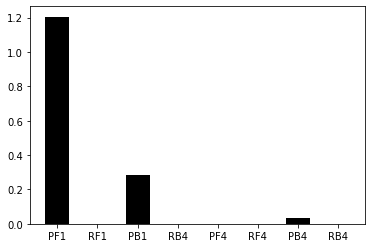

In [38]:
to_plot = [np.nanmean(preplay_forward_baseline), np.nanmean(replay_forward_baseline), np.nanmean(preplay_reverse_baseline), np.nanmean(replay_reverse_baseline), np.nanmean(preplay_forward_rew_shift), np.nanmean(replay_forward_rew_shift), np.nanmean(preplay_reverse_rew_shift), np.nanmean(replay_reverse_rew_shift)]
plt.bar(range(len(to_plot)), to_plot, width = 0.6, color = 'black')
plt.xticks(range(len(to_plot)), ["PF1", 'RF1', 'PB1', 'RB4', "PF4", 'RF4', 'PB4', 'RB4'])
plt.savefig("results/Mattar/mattar_fig_5_e_open_maze.pdf")